In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [34]:
df=yf.download( 'AMZN' , start='2020-01-01', end=dt.date.today())

[*********************100%***********************]  1 of 1 completed


In [35]:
#First 5 rows of the data set 
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


In [36]:
#New dataframe with just Adj Close column 
df=df[['Adj Close']]
df.head()

,Adj Close
Date,
2020-01-02,94.900497
2020-01-03,93.748497
2020-01-06,95.143997
2020-01-07,95.343002
2020-01-08,94.598503


In [37]:
#Checking to see if there are any null values 
df.isnull().sum()

Adj Close    0
dtype: int64

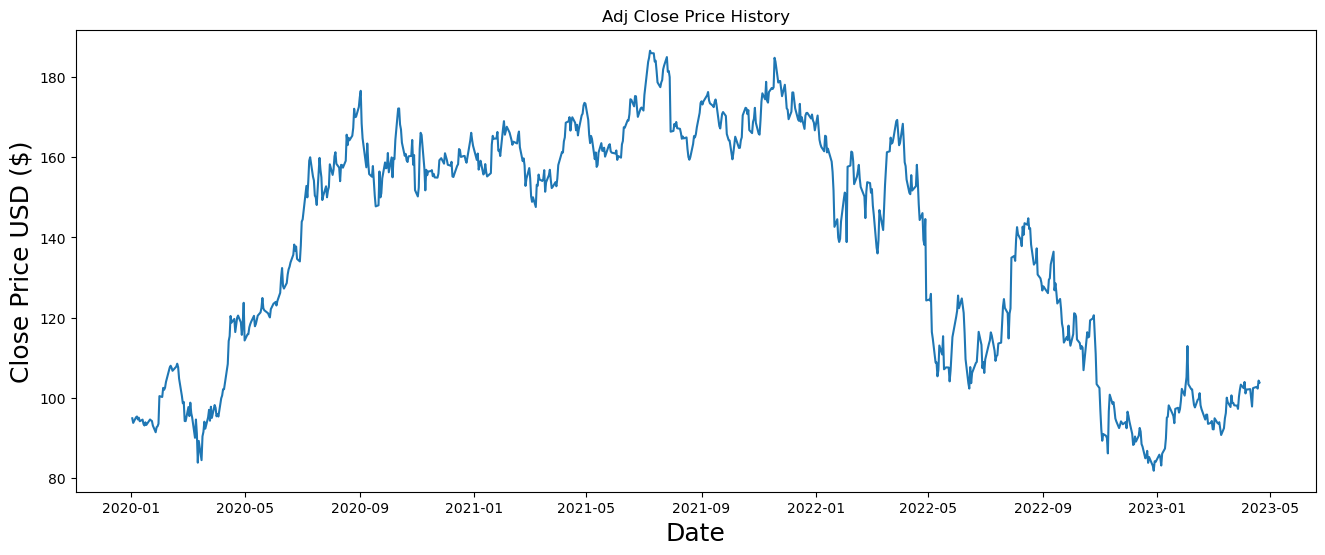

In [38]:
#Visualising the Adj Close price for Amazon 
plt.figure(figsize=(16,6))
plt.title('Adj Close Price History')
plt.plot(df)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)
df

/var/folders/ql/ww08pzlj1vjc9c_hgrsytrq40000gn/T/ipykernel_48681/311848663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-future_days)


,Adj Close,Prediction
Date,,
2020-01-02,94.900497,103.963997
2020-01-03,93.748497,106.695503
2020-01-06,95.143997,107.540001
2020-01-07,95.343002,108.000000
2020-01-08,94.598503,107.493500
...,...,...
2023-04-14,102.510002,NaN
2023-04-17,102.739998,NaN
2023-04-18,102.300003,NaN


In [40]:
#Create a feature data set (x) and convert it to a numpy array and remove the last 'x' rows/ days
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
x

/var/folders/ql/ww08pzlj1vjc9c_hgrsytrq40000gn/T/ipykernel_48681/56136431.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'], 1))[:-future_days]


array([[ 94.90049744],
       [ 93.74849701],
       [ 95.14399719],
       [ 95.34300232],
       [ 94.59850311],
       [ 95.05249786],
       [ 94.15799713],
       [ 94.56500244],
       [ 93.47200012],
       [ 93.10099792],
       [ 93.89700317],
       [ 93.23600006],
       [ 94.59999847],
       [ 94.3730011 ],
       [ 94.22899628],
       [ 93.08200073],
       [ 91.41699982],
       [ 92.66249847],
       [ 92.90000153],
       [ 93.53399658],
       [100.43599701],
       [100.20999908],
       [102.48349762],
       [101.99349976],
       [102.5114975 ],
       [103.96399689],
       [106.69550323],
       [107.54000092],
       [108.        ],
       [107.49349976],
       [106.74349976],
       [107.78350067],
       [108.51100159],
       [107.65499878],
       [104.79850006],
       [100.46450043],
       [ 98.63700104],
       [ 98.97949982],
       [ 94.21499634],
       [ 94.1875    ],
       [ 97.69750214],
       [ 95.44950104],
       [ 98.79149628],
       [ 96

In [41]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last x rows/ days
y = np.array(df['Prediction'])[:-future_days]
y

array([103.96399689, 106.69550323, 107.54000092, 108.        ,
       107.49349976, 106.74349976, 107.78350067, 108.51100159,
       107.65499878, 104.79850006, 100.46450043,  98.63700104,
        98.97949982,  94.21499634,  94.1875    ,  97.69750214,
        95.44950104,  98.79149628,  96.20149994,  95.05449677,
        90.03050232,  94.59100342,  91.04299927,  83.83049774,
        89.25      ,  84.45749664,  90.39199829,  91.5       ,
        94.04650116,  92.30449677,  95.14150238,  97.00499725,
        94.29199982,  97.77449799,  95.00499725,  98.19750214,
        97.48600006,  95.38500214,  95.9414978 ,  95.32949829,
        99.87950134, 100.58000183, 102.15000153, 102.13800049,
       108.4434967 , 114.16600037, 115.38400269, 120.40950012,
       118.75      , 119.68049622, 116.40599823, 118.17449951,
       119.97250366, 120.51100159, 118.80000305, 115.70400238,
       118.63549805, 123.69999695, 114.30200195, 115.79949951,
       115.88999939, 117.56300354, 118.38050079, 118.98

In [42]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [43]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [44]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/var/folders/ql/ww08pzlj1vjc9c_hgrsytrq40000gn/T/ipykernel_48681/1296691074.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[100.05000305],
       [ 98.23999786],
       [ 97.61000061],
       [ 99.54000092],
       [ 99.69999695],
       [101.16000366],
       [ 98.15000153],
       [ 97.19999695],
       [ 94.58000183],
       [ 95.79000092],
       [ 95.81999969],
       [ 93.5       ],
       [ 93.76000214],
       [ 94.23000336],
       [ 92.16999817],
       [ 92.12999725],
       [ 94.90000153],
       [ 93.75      ],
       [ 93.55000305],
       [ 93.91999817],
       [ 92.25      ],
       [ 90.73000336],
       [ 92.43000031],
       [ 94.87999725],
       [ 96.19999695]])

In [45]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
tree_prediction

array([100.04000092,  98.94999695,  97.70999908, 117.84750366,
       117.84750366,  98.70999908,  98.12999725,  98.04000092,
        97.23999786, 100.25      , 100.25      , 107.65499878,
        99.91999817,  94.1875    , 101.09999847, 102.05999756,
       103.96399689,  99.91999817,  97.83000183, 102.40000153,
       102.51000214, 102.73999786, 102.30000305, 104.30000305,
       103.80999756])

In [46]:
#Show the linear regression model prediction
lr_prediction = lr.predict(x_future)
lr_prediction 

array([106.71223043, 105.17782664, 104.64375625, 106.27988404,
       106.41551819, 107.65321621, 105.10153364, 104.29618201,
       102.07512184, 103.10087977, 103.12631077, 101.15956706,
       101.37997983, 101.77841607, 100.03207866,  99.9981685 ,
       102.34639661, 101.37150067, 101.20195637, 101.51561398,
       100.09989897,  98.81134541, 100.25249143, 102.3294383 ,
       103.44844754])

/var/folders/ql/ww08pzlj1vjc9c_hgrsytrq40000gn/T/ipykernel_48681/2022571971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

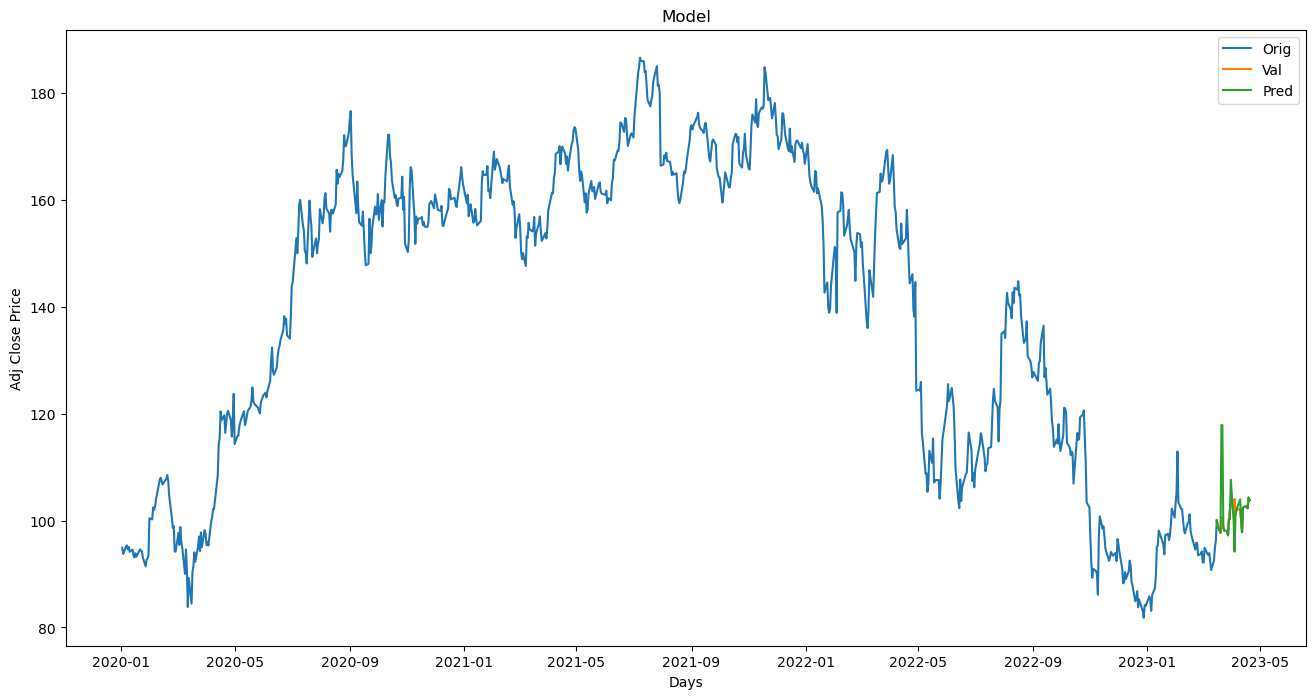

In [47]:
#Visualise the tree prediction model
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show

/var/folders/ql/ww08pzlj1vjc9c_hgrsytrq40000gn/T/ipykernel_48681/1543867948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

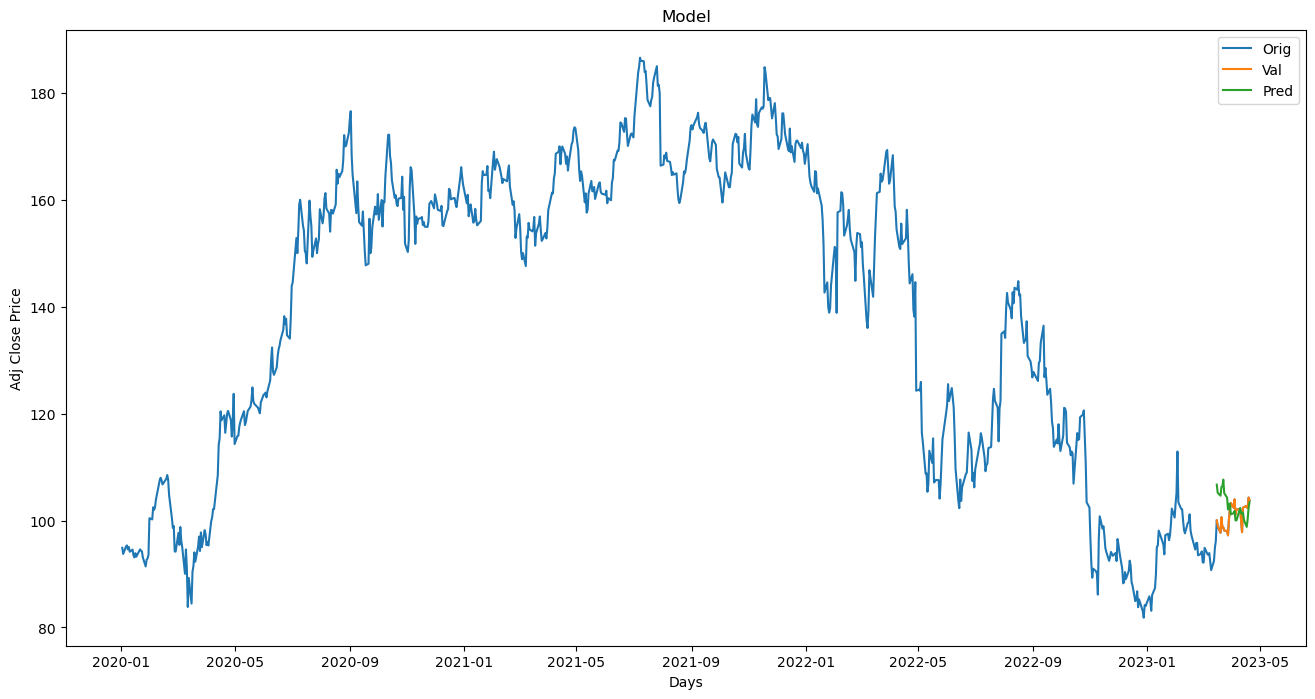

In [48]:
#Visualise the linear regression model prediction
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show